# 509 Final Project

## Globally import libraries

In [1]:
import numpy as np
import pandas as pd
import pymysql as mysql
import matplotlib.pyplot as plt
import os
import shutil
import re
import logging
import time
import datetime as dt
import zipfile
import requests
from bs4 import BeautifulSoup
import datetime
import re
import regex as rex
from collections import defaultdict, Counter
import random
import json
from string import punctuation

import nltk
from nltk.corpus import stopwords

#import mysql.connector

# Set pandas global options
pd.options.display.max_rows = 17

## Upload data from CSV

In [2]:
'''Dir nav citation:
https://softhints.com/python-change-directory-parent/'''
curr_dir = os.path.abspath(os.curdir)
print(curr_dir)
os.chdir("..")
up1_dir = os.path.abspath(os.curdir)
print(up1_dir)

C:\Users\acarr\Documents\GitHub\ADS509_Final_project\deliverables
C:\Users\acarr\Documents\GitHub\ADS509_Final_project


In [3]:
# change `data_location` to the location of the folder on your machine.
data_location = 'data'

file_in_name01 = 'master.csv'

file_in_path01 = os.path.join(up1_dir, data_location, file_in_name01)

print(f'CSV file 1 in path: {file_in_path01}')

CSV file 1 in path: C:\Users\acarr\Documents\GitHub\ADS509_Final_project\data\master.csv


### Review dataframe

In [4]:
slct_tbl_full_df01 = pd.read_csv(file_in_path01)
print(f'Dataframe shape: {slct_tbl_full_df01.shape}')
display(slct_tbl_full_df01.head())

Dataframe shape: (4509, 7)


,source_name,author,title,url,publish_date,content,article_text
0,The Washington Post,NaN,Alabama Highway sign hacked with white suprema...,https://www.washingtonpost.com/nation/2023/05/...,2023-05-30T16:31:36Z,Travelers in Alabama driving on Interstate 65 ...,Travelers in Alabama driving on Interstate 65 ...
1,The Washington Post,Amber Phillips,Breaking down the GOP investigation into the B...,https://www.washingtonpost.com/politics/2023/0...,2023-05-30T19:56:33Z,Comment on this story\r\nComment\r\nA federal ...,A federal prosecutor may be nearing a decision...
2,The Washington Post,David Ovalle,Appeals court paves way for Purdue Pharma opio...,https://www.washingtonpost.com/health/2023/05/...,2023-05-30T23:52:34Z,Comment on this story\r\nComment\r\nA federal ...,A federal appeals court Tuesday cleared the wa...
3,The Washington Post,Philip Bump,Trump pledges to win an immigration fight he d...,https://www.washingtonpost.com/politics/2023/0...,2023-05-30T18:30:47Z,Comment on this story\r\nComment\r\nSpeaking i...,"Speaking in Orlando in November 2015, Republic..."
4,The Washington Post,NaN,The revolt of Christian home-schoolers...,https://www.washingtonpost.com/education/inter...,2023-05-30T18:25:37Z,Deep Reads features The Washington Posts best ...,NaN


## Exploratory Data Analysis (EDA)

### Count missing `article_text` feature

In [5]:
count_nan = slct_tbl_full_df01.isnull().sum()
 
# printing the number of values present
# in the column
print('Number of NaN values present: ' + str(count_nan))

Number of NaN values present: source_name        0
author            37
title              0
url                0
publish_date       0
content         3351
article_text       1
dtype: int64


### Count blank `article_text` feature

In [6]:
print(len(slct_tbl_full_df01[slct_tbl_full_df01['article_text']=='']))
display(slct_tbl_full_df01[slct_tbl_full_df01['article_text']==''].head(20))

0


,source_name,author,title,url,publish_date,content,article_text


### Remove missing `article_text` rows

In [7]:
'''Drop missing citation:
https://pandas.pydata.org/pandas-docs/stable/reference
/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna'''
slct_tbl_full_df02 = slct_tbl_full_df01.dropna(subset=['article_text'])
print(f'Dataframe shape: {slct_tbl_full_df02.shape}')
display(slct_tbl_full_df02.head())

Dataframe shape: (4508, 7)


,source_name,author,title,url,publish_date,content,article_text
0,The Washington Post,NaN,Alabama Highway sign hacked with white suprema...,https://www.washingtonpost.com/nation/2023/05/...,2023-05-30T16:31:36Z,Travelers in Alabama driving on Interstate 65 ...,Travelers in Alabama driving on Interstate 65 ...
1,The Washington Post,Amber Phillips,Breaking down the GOP investigation into the B...,https://www.washingtonpost.com/politics/2023/0...,2023-05-30T19:56:33Z,Comment on this story\r\nComment\r\nA federal ...,A federal prosecutor may be nearing a decision...
2,The Washington Post,David Ovalle,Appeals court paves way for Purdue Pharma opio...,https://www.washingtonpost.com/health/2023/05/...,2023-05-30T23:52:34Z,Comment on this story\r\nComment\r\nA federal ...,A federal appeals court Tuesday cleared the wa...
3,The Washington Post,Philip Bump,Trump pledges to win an immigration fight he d...,https://www.washingtonpost.com/politics/2023/0...,2023-05-30T18:30:47Z,Comment on this story\r\nComment\r\nSpeaking i...,"Speaking in Orlando in November 2015, Republic..."
5,The Washington Post,Paul Waldman,Why fear of change will drive the GOP presiden...,https://www.washingtonpost.com/opinions/2023/0...,2023-05-30T10:00:00Z,"Comment on this story\r\nComment\r\nLook, we k...","“Look, we know our country’s going in the wron..."


In [8]:
# Raw text character and word counts
slct_tbl_full_df02['char_cnt'] = slct_tbl_full_df02['article_text'].apply(len)
slct_tbl_full_df02['word_cnt'] = slct_tbl_full_df02['article_text'].apply(lambda x: len(x.split()))
display(slct_tbl_full_df02.head())

C:\Users\acarr\AppData\Local\Temp\ipykernel_20896\1577128361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slct_tbl_full_df02['char_cnt'] = slct_tbl_full_df02['article_text'].apply(len)
C:\Users\acarr\AppData\Local\Temp\ipykernel_20896\1577128361.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slct_tbl_full_df02['word_cnt'] = slct_tbl_full_df02['article_text'].apply(lambda x: len(x.split()))


,source_name,author,title,url,publish_date,content,article_text,char_cnt,word_cnt
0,The Washington Post,NaN,Alabama Highway sign hacked with white suprema...,https://www.washingtonpost.com/nation/2023/05/...,2023-05-30T16:31:36Z,Travelers in Alabama driving on Interstate 65 ...,Travelers in Alabama driving on Interstate 65 ...,5746,920
1,The Washington Post,Amber Phillips,Breaking down the GOP investigation into the B...,https://www.washingtonpost.com/politics/2023/0...,2023-05-30T19:56:33Z,Comment on this story\r\nComment\r\nA federal ...,A federal prosecutor may be nearing a decision...,6814,1089
2,The Washington Post,David Ovalle,Appeals court paves way for Purdue Pharma opio...,https://www.washingtonpost.com/health/2023/05/...,2023-05-30T23:52:34Z,Comment on this story\r\nComment\r\nA federal ...,A federal appeals court Tuesday cleared the wa...,5479,869
3,The Washington Post,Philip Bump,Trump pledges to win an immigration fight he d...,https://www.washingtonpost.com/politics/2023/0...,2023-05-30T18:30:47Z,Comment on this story\r\nComment\r\nSpeaking i...,"Speaking in Orlando in November 2015, Republic...",5907,955
5,The Washington Post,Paul Waldman,Why fear of change will drive the GOP presiden...,https://www.washingtonpost.com/opinions/2023/0...,2023-05-30T10:00:00Z,"Comment on this story\r\nComment\r\nLook, we k...","“Look, we know our country’s going in the wron...",4563,750


### Descriptive statistics

In [9]:
slct_tbl_full_df02[['source_name',
                    'author',
                    'publish_date',
                    'article_text']].describe(include="O").T

,count,unique,top,freq
source_name,4508,4,Fox News,2192
author,4472,956,Associated Press,450
publish_date,4508,4486,2023-05-13T11:00:00Z,3
article_text,4508,4508,Travelers in Alabama driving on Interstate 65 ...,1


In [10]:
slct_tbl_full_df02.describe().T

,count,mean,std,min,25%,50%,75%,max
char_cnt,4508.0,4655.501109,3137.364995,131.0,2832.0,3951.5,5664.5,80585.0
word_cnt,4508.0,731.031500,518.576508,16.0,432.0,607.0,889.0,14322.0


In [11]:
slct_tbl_full_df02['source_name'].value_counts()

Fox News               2192
Breitbart News         1017
CNN                     773
The Washington Post     526
Name: source_name, dtype: int64

### Examine inclusion of "centrist" sources indicated by `author` feature

In [12]:
slct_tbl_full_df02s1 = slct_tbl_full_df02[slct_tbl_full_df02['author'].isin(['msn', 'Associated Press', 'Reuters'])]

display(slct_tbl_full_df02s1[slct_tbl_full_df02s1['author']=='msn'])

display(slct_tbl_full_df02s1.groupby(by=['source_name', 'author']).count())

,source_name,author,title,url,publish_date,content,article_text,char_cnt,word_cnt
17,The Washington Post,msn,State Dept seeks to expand space diplomacy...,https://www.washingtonpost.com/technology/2023...,2023-05-30T17:00:04Z,State Department seeks to expand its space dip...,"With tensions rising in space, low Earth orbit...",6249,1008
18,The Washington Post,msn,SHOCK IN RUSSIAN CAPITAL,https://www.washingtonpost.com/world/2023/05/3...,2023-05-30T13:00:04Z,"KYIV, Ukraine A drone attack hit Moscow on Tue...","KYIV, Ukraine — A drone attack hit Moscow on T...",8700,1395
22,The Washington Post,msn,Debate over whether AI will destroy us is divi...,https://www.washingtonpost.com/technology/2023...,2023-05-20T21:00:04Z,The debate over whether AI will destroy us is ...,"At a congressional hearing this week, OpenAI C...",11197,1818
81,The Washington Post,msn,Corporate bankruptcies creeping up as pressure...,https://www.washingtonpost.com/business/2023/0...,2023-05-23T12:00:04Z,Corporate bankruptcies are creeping up as pres...,Corporate bankruptcies are edging back up afte...,5115,802
84,The Washington Post,msn,The looming existential crisis for cable news...,https://www.washingtonpost.com/media/2023/05/2...,2023-05-23T14:00:04Z,The looming existential crisis for cable news ...,"After a week of promotion and controversy, CNN...",7136,1154
...,...,...,...,...,...,...,...,...,...
492,The Washington Post,msn,Biden shows growing appetite to cross Putin's ...,https://www.washingtonpost.com/national-securi...,2023-06-01T11:00:04Z,President Bidens decision last month to help U...,President Biden’s decision last month to help ...,9676,1533
502,The Washington Post,msn,Behind-the-scenes videos of Tucker Carlson wer...,https://www.washingtonpost.com/media/2023/06/0...,2023-06-02T02:00:03Z,Behind-the-scenes videos of Tucker Carlson wer...,In the days after Tucker Carlson’s abrupt firi...,5724,912
503,The Washington Post,msn,Georgia probe of Trump broadens to activities ...,https://www.washingtonpost.com/nation/2023/06/...,2023-06-02T11:00:04Z,Georgia probe of Trump broadens to activities ...,An Atlanta-area investigation of alleged elect...,14622,2359
506,The Washington Post,msn,"DRAMA: Couple, both nurses, save man's life mi...",https://www.washingtonpost.com/lifestyle/2023/...,2023-06-02T17:00:04Z,"Emily Raines and her boyfriend, Daniel Shiffle...","Emily Raines and her boyfriend, Daniel Shiffle...",5161,898


title  url  publish_date  content  \
source_name         author                                                
CNN                 Reuters               6    6             6        1   
Fox News            Associated Press    450  450           450       73   
                    Reuters               1    1             1        0   
The Washington Post msn                  25   25            25       25   

                                      article_text  char_cnt  word_cnt  
source_name         author                                              
CNN                 Reuters                      6         6         6  
Fox News            Associated Press           450       450       450  
                    Reuters                      1         1         1  
The Washington Post msn                         25        25        25

In [13]:
counter = Counter(slct_tbl_full_df02['author'])

word_cutoff = 5
con_feature_words = set()

for word, count in counter.items():
    if count > word_cutoff:
        con_feature_words.add(word)
        
print(f"With a word cutoff of {word_cutoff}, we have {len(con_feature_words)} words as features in the model.")
print(con_feature_words)

With a word cutoff of 5, we have 151 words as features in the model.
{nan, 'Joshua Klein, Joshua Klein', 'Stephen Collinson', 'Michael Ruiz', 'Ariane de Vogue', 'Tami Luhby', 'Mariana Alfaro', 'Associated Press', 'Paul Waldman', 'Anders Hagstrom', 'Nicole Goodkind', 'Elaine Mallon, Elaine Mallon', 'Ian Hanchett, Ian Hanchett', 'Kyle Morris', 'Sean Lyngaas', 'Paul Kane', 'Paulina Dedaj', 'Jon Brown', 'Hannah Knowles', 'Tony Romm', 'Sarah Rumpf-Whitten', 'Joel B. Pollak, Joel B. Pollak', 'Pam Key, Pam Key', 'Kerry Byrne', 'Philip Bump', 'Fox News Staff', 'Ryan Gaydos', 'Warner Todd Huston, Warner Todd Huston', 'Tierney Sneed', 'Andrea Vacchiano', 'Hanna Panreck', 'Brandon Gillespie', 'Sean Moran, Sean Moran', 'AWR Hawkins, AWR Hawkins', 'Adam Sabes', 'Elizabeth Heckman', 'Hannah Ray Lambert', 'David Ng, David Ng', 'Oliver JJ Lane, Oliver JJ Lane', 'Bradford Betz', 'Jennifer Rubin', 'Glenn Kessler', 'Reuters', 'Greg Wehner', 'Wendell Husebø, Wendell Husebø', 'Ryan Morik', 'Joshua Nelson',

In [30]:
slct_tbl_full_df03 = slct_tbl_full_df02[~slct_tbl_full_df02['author'].isin(['msn', 'Associated Press', 'Reuters'])]
slct_tbl_full_df03.reset_index()
slct_tbl_full_df03['political_lean'] = 'right'
print(slct_tbl_full_df03.shape)
display(slct_tbl_full_df03.head())
slct_tbl_full_df03.loc[(slct_tbl_full_df03['source_name'] == 'The Washington Post') | (slct_tbl_full_df03['source_name'] == 'CNN'), 'political_lean'] = 'left'

display(slct_tbl_full_df03.head())

display(slct_tbl_full_df03['political_lean'].value_counts())

(4026, 10)


C:\Users\acarr\AppData\Local\Temp\ipykernel_20896\3219012467.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slct_tbl_full_df03['political_lean'] = 'right'


,source_name,author,title,url,publish_date,content,article_text,char_cnt,word_cnt,political_lean
0,The Washington Post,NaN,Alabama Highway sign hacked with white suprema...,https://www.washingtonpost.com/nation/2023/05/...,2023-05-30T16:31:36Z,Travelers in Alabama driving on Interstate 65 ...,Travelers in Alabama driving on Interstate 65 ...,5746,920,right
1,The Washington Post,Amber Phillips,Breaking down the GOP investigation into the B...,https://www.washingtonpost.com/politics/2023/0...,2023-05-30T19:56:33Z,Comment on this story\r\nComment\r\nA federal ...,A federal prosecutor may be nearing a decision...,6814,1089,right
2,The Washington Post,David Ovalle,Appeals court paves way for Purdue Pharma opio...,https://www.washingtonpost.com/health/2023/05/...,2023-05-30T23:52:34Z,Comment on this story\r\nComment\r\nA federal ...,A federal appeals court Tuesday cleared the wa...,5479,869,right
3,The Washington Post,Philip Bump,Trump pledges to win an immigration fight he d...,https://www.washingtonpost.com/politics/2023/0...,2023-05-30T18:30:47Z,Comment on this story\r\nComment\r\nSpeaking i...,"Speaking in Orlando in November 2015, Republic...",5907,955,right
5,The Washington Post,Paul Waldman,Why fear of change will drive the GOP presiden...,https://www.washingtonpost.com/opinions/2023/0...,2023-05-30T10:00:00Z,"Comment on this story\r\nComment\r\nLook, we k...","“Look, we know our country’s going in the wron...",4563,750,right


,source_name,author,title,url,publish_date,content,article_text,char_cnt,word_cnt,political_lean
0,The Washington Post,NaN,Alabama Highway sign hacked with white suprema...,https://www.washingtonpost.com/nation/2023/05/...,2023-05-30T16:31:36Z,Travelers in Alabama driving on Interstate 65 ...,Travelers in Alabama driving on Interstate 65 ...,5746,920,left
1,The Washington Post,Amber Phillips,Breaking down the GOP investigation into the B...,https://www.washingtonpost.com/politics/2023/0...,2023-05-30T19:56:33Z,Comment on this story\r\nComment\r\nA federal ...,A federal prosecutor may be nearing a decision...,6814,1089,left
2,The Washington Post,David Ovalle,Appeals court paves way for Purdue Pharma opio...,https://www.washingtonpost.com/health/2023/05/...,2023-05-30T23:52:34Z,Comment on this story\r\nComment\r\nA federal ...,A federal appeals court Tuesday cleared the wa...,5479,869,left
3,The Washington Post,Philip Bump,Trump pledges to win an immigration fight he d...,https://www.washingtonpost.com/politics/2023/0...,2023-05-30T18:30:47Z,Comment on this story\r\nComment\r\nSpeaking i...,"Speaking in Orlando in November 2015, Republic...",5907,955,left
5,The Washington Post,Paul Waldman,Why fear of change will drive the GOP presiden...,https://www.washingtonpost.com/opinions/2023/0...,2023-05-30T10:00:00Z,"Comment on this story\r\nComment\r\nLook, we k...","“Look, we know our country’s going in the wron...",4563,750,left


right    2758
left     1268
Name: political_lean, dtype: int64

<Axes: title={'center': 'Class distribution'}>

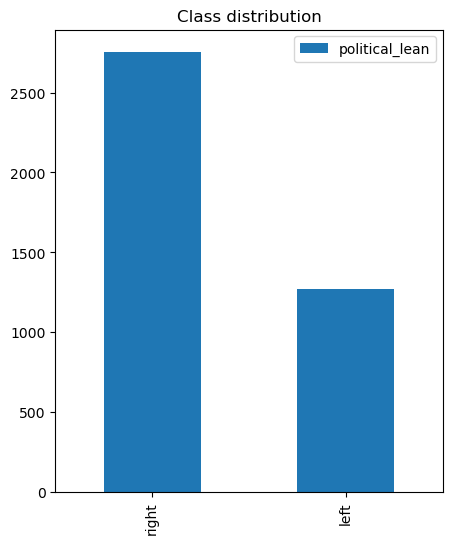

In [31]:
slct_tbl_full_df03['political_lean'].value_counts().plot(kind="bar",
                                                         legend=True,
                                                         figsize=(5,6),
                                                         title='Class distribution')

### Plot word counts

source_name
Breitbart News         Axes(0.125,0.11;0.775x0.77)
CNN                    Axes(0.125,0.11;0.775x0.77)
Fox News               Axes(0.125,0.11;0.775x0.77)
The Washington Post    Axes(0.125,0.11;0.775x0.77)
Name: word_cnt, dtype: object

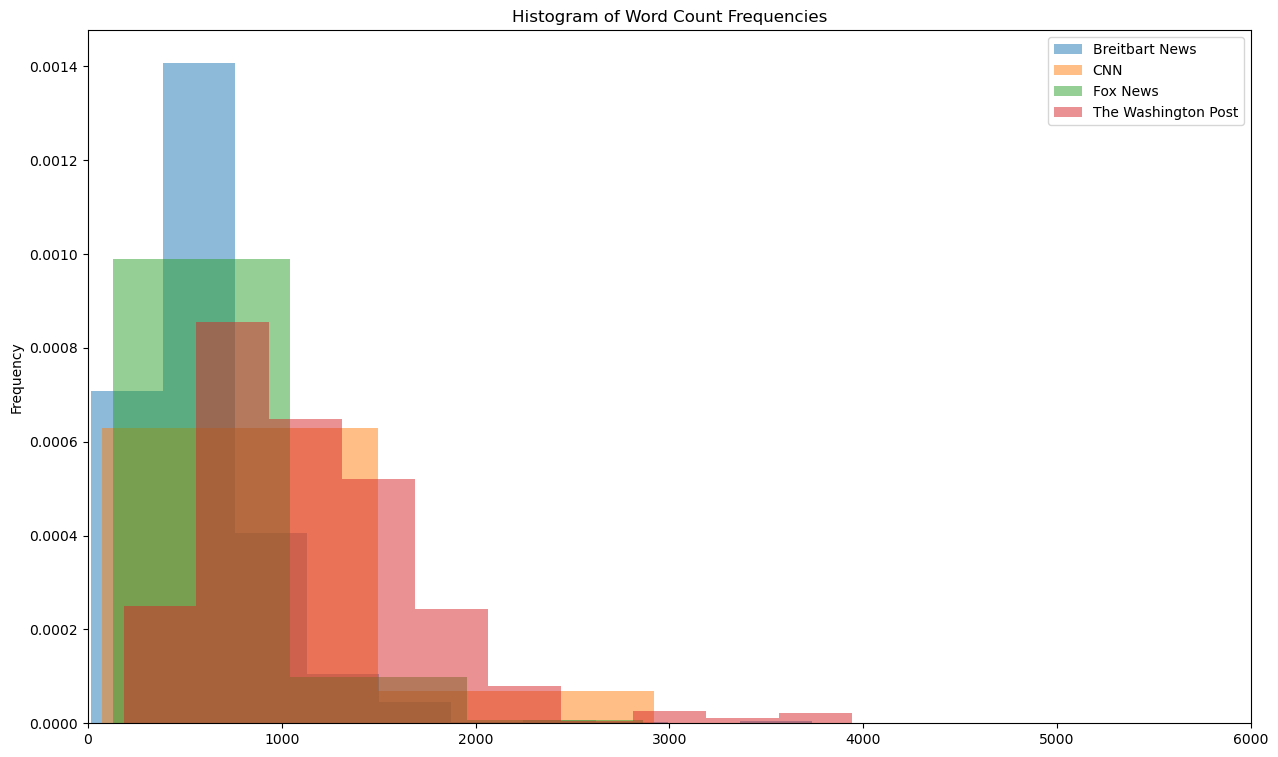

In [32]:
slct_tbl_full_df03.groupby('source_name')['word_cnt'].plot(kind="hist",
                                                           density=True,
                                                           alpha=0.5,
                                                           legend=True,
                                                           figsize=(15,9),
                                                           title='Histogram of Word Count Frequencies',
                                                           xlim=(0,6000))

## Data preprocessing

In [33]:
slct_tbl_full_df03['lower'] = slct_tbl_full_df03['article_text'].apply(str.lower)

print(slct_tbl_full_df03.shape)
display(slct_tbl_full_df03.head())

(4026, 11)


C:\Users\acarr\AppData\Local\Temp\ipykernel_20896\1877855087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slct_tbl_full_df03['lower'] = slct_tbl_full_df03['article_text'].apply(str.lower)


,source_name,author,title,url,publish_date,content,article_text,char_cnt,word_cnt,political_lean,lower
0,The Washington Post,NaN,Alabama Highway sign hacked with white suprema...,https://www.washingtonpost.com/nation/2023/05/...,2023-05-30T16:31:36Z,Travelers in Alabama driving on Interstate 65 ...,Travelers in Alabama driving on Interstate 65 ...,5746,920,left,travelers in alabama driving on interstate 65 ...
1,The Washington Post,Amber Phillips,Breaking down the GOP investigation into the B...,https://www.washingtonpost.com/politics/2023/0...,2023-05-30T19:56:33Z,Comment on this story\r\nComment\r\nA federal ...,A federal prosecutor may be nearing a decision...,6814,1089,left,a federal prosecutor may be nearing a decision...
2,The Washington Post,David Ovalle,Appeals court paves way for Purdue Pharma opio...,https://www.washingtonpost.com/health/2023/05/...,2023-05-30T23:52:34Z,Comment on this story\r\nComment\r\nA federal ...,A federal appeals court Tuesday cleared the wa...,5479,869,left,a federal appeals court tuesday cleared the wa...
3,The Washington Post,Philip Bump,Trump pledges to win an immigration fight he d...,https://www.washingtonpost.com/politics/2023/0...,2023-05-30T18:30:47Z,Comment on this story\r\nComment\r\nSpeaking i...,"Speaking in Orlando in November 2015, Republic...",5907,955,left,"speaking in orlando in november 2015, republic..."
5,The Washington Post,Paul Waldman,Why fear of change will drive the GOP presiden...,https://www.washingtonpost.com/opinions/2023/0...,2023-05-30T10:00:00Z,"Comment on this story\r\nComment\r\nLook, we k...","“Look, we know our country’s going in the wron...",4563,750,left,"“look, we know our country’s going in the wron..."


In [34]:
slct_tbl_full_df03['split'] = slct_tbl_full_df03['lower'].apply(str.split)

print(slct_tbl_full_df03.shape)
display(slct_tbl_full_df03.head())

for c in range(0,2):
    print(slct_tbl_full_df03['split'][c])

C:\Users\acarr\AppData\Local\Temp\ipykernel_20896\3794848327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slct_tbl_full_df03['split'] = slct_tbl_full_df03['lower'].apply(str.split)


(4026, 12)


,source_name,author,title,url,publish_date,content,article_text,char_cnt,word_cnt,political_lean,lower,split
0,The Washington Post,NaN,Alabama Highway sign hacked with white suprema...,https://www.washingtonpost.com/nation/2023/05/...,2023-05-30T16:31:36Z,Travelers in Alabama driving on Interstate 65 ...,Travelers in Alabama driving on Interstate 65 ...,5746,920,left,travelers in alabama driving on interstate 65 ...,"[travelers, in, alabama, driving, on, intersta..."
1,The Washington Post,Amber Phillips,Breaking down the GOP investigation into the B...,https://www.washingtonpost.com/politics/2023/0...,2023-05-30T19:56:33Z,Comment on this story\r\nComment\r\nA federal ...,A federal prosecutor may be nearing a decision...,6814,1089,left,a federal prosecutor may be nearing a decision...,"[a, federal, prosecutor, may, be, nearing, a, ..."
2,The Washington Post,David Ovalle,Appeals court paves way for Purdue Pharma opio...,https://www.washingtonpost.com/health/2023/05/...,2023-05-30T23:52:34Z,Comment on this story\r\nComment\r\nA federal ...,A federal appeals court Tuesday cleared the wa...,5479,869,left,a federal appeals court tuesday cleared the wa...,"[a, federal, appeals, court, tuesday, cleared,..."
3,The Washington Post,Philip Bump,Trump pledges to win an immigration fight he d...,https://www.washingtonpost.com/politics/2023/0...,2023-05-30T18:30:47Z,Comment on this story\r\nComment\r\nSpeaking i...,"Speaking in Orlando in November 2015, Republic...",5907,955,left,"speaking in orlando in november 2015, republic...","[speaking, in, orlando, in, november, 2015,, r..."
5,The Washington Post,Paul Waldman,Why fear of change will drive the GOP presiden...,https://www.washingtonpost.com/opinions/2023/0...,2023-05-30T10:00:00Z,"Comment on this story\r\nComment\r\nLook, we k...","“Look, we know our country’s going in the wron...",4563,750,left,"“look, we know our country’s going in the wron...","[“look,, we, know, our, country’s, going, in, ..."


['travelers', 'in', 'alabama', 'driving', 'on', 'interstate', '65', 'to', 'parties', 'and', 'barbecues', 'on', 'memorial', 'day', 'might', 'have', 'seen', 'messages', 'on', 'digital', 'road', 'signs', 'honoring', 'veterans', 'who', 'died', 'fighting', 'for', 'the', 'united', 'states.', 'but', 'that’s', 'not', 'what', 'some', 'drivers', 'near', 'clanton,', 'ala.,', 'saw', 'on', 'monday.', 'instead,', 'motorists', 'reported', 'seeing', 'a', 'sign', 'that', 'was', 'apparently', 'hacked', 'to', 'display', 'the', 'words', '“reclaim', 'america,”', 'a', 'white', 'nationalist', 'slogan,', 'and', '“patriot', 'front', 'us,”', 'referencing', 'the', 'white', 'supremacist', 'group', 'that', 'was', 'involved', 'in', 'the', 'deadly', '2017', 'unite', 'the', 'right', 'rally', 'in', 'charlottesville.', '“how', 'does', 'this', 'come', 'about?”', 'wrote', 'sarah', 'hughes,', 'a', 'motorist', 'who', 'captured', 'photos', 'of', 'the', 'sign', 'and', 'posted', 'them', 'on', 'twitter.', '“weird', 'as', 'hell

In [40]:
sw = stopwords.words("english")

# Add additional stop words
sw.extend(['',
           '️',
           'arent',
           'cannot',
           'cant',
           'couldnt',
           'couldve',
           'didnt',
           'doesnt',
           'dont',
           'hadnt',
           'hasnt',
           'havent',
           'hes',
           'im',
           "i'm",
           'isnt',
           'it’s',
           'ive',
           '𝚘𝚏',
           'mightnt',
           'mustnt',
           'neednt',
           'shant',
           'shes',
           'shouldnt',
           'shouldve',
           'thatll',
           'theyll',
           'theyve',
           'wasnt',
           'werent',
           'whats',
           'weve',
           'wont',
           'wouldnt',
           'wouldve',
           'yall',
           'youd',
           'youll',
           'youre',
           'youve',
           "we'll",
           "you’re",
           "you’ve",
           "you’ll",
           "you’d",
           "she’s",
           "it’s",
           "that’ll",
           "don’t",
           "should’ve",
           "aren’t",
           "couldn’t",
           "didn’t",
           "doesn’t",
           "hadn’t",
           "hasn’t",
           "haven’t",
           "isn’t",
           "mightn’t",
           "mustn’t",
           "needn’t",
           "shan’t",
           "shouldn’t",
           "wasn’t",
           "weren’t",
           "won’t",
           "wouldn’t",
           "i’m",
           "we’ll",])

print(sw)

def sw_remover(tokens):
    return [t for t in tokens if t.lower() not in sw]

slct_tbl_full_df03['no_sw'] = slct_tbl_full_df03['split'].apply(sw_remover)

print(slct_tbl_full_df03.shape)
display(slct_tbl_full_df03.head())

for c in range(0,2):
    print(slct_tbl_full_df03['no_sw'][c])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

C:\Users\acarr\AppData\Local\Temp\ipykernel_20896\271845622.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slct_tbl_full_df03['no_sw'] = slct_tbl_full_df03['split'].apply(sw_remover)


,source_name,author,title,url,publish_date,content,article_text,char_cnt,word_cnt,political_lean,lower,split,no_sw,no_sw_join,no_sw_join_no_punc
0,The Washington Post,NaN,Alabama Highway sign hacked with white suprema...,https://www.washingtonpost.com/nation/2023/05/...,2023-05-30T16:31:36Z,Travelers in Alabama driving on Interstate 65 ...,Travelers in Alabama driving on Interstate 65 ...,5746,920,left,travelers in alabama driving on interstate 65 ...,"[travelers, in, alabama, driving, on, intersta...","[travelers, alabama, driving, interstate, 65, ...",travelers alabama driving interstate 65 partie...,travelers alabama driving interstate 65 partie...
1,The Washington Post,Amber Phillips,Breaking down the GOP investigation into the B...,https://www.washingtonpost.com/politics/2023/0...,2023-05-30T19:56:33Z,Comment on this story\r\nComment\r\nA federal ...,A federal prosecutor may be nearing a decision...,6814,1089,left,a federal prosecutor may be nearing a decision...,"[a, federal, prosecutor, may, be, nearing, a, ...","[federal, prosecutor, may, nearing, decision, ...",federal prosecutor may nearing decision whethe...,federal prosecutor may nearing decision whethe...
2,The Washington Post,David Ovalle,Appeals court paves way for Purdue Pharma opio...,https://www.washingtonpost.com/health/2023/05/...,2023-05-30T23:52:34Z,Comment on this story\r\nComment\r\nA federal ...,A federal appeals court Tuesday cleared the wa...,5479,869,left,a federal appeals court tuesday cleared the wa...,"[a, federal, appeals, court, tuesday, cleared,...","[federal, appeals, court, tuesday, cleared, wa...",federal appeals court tuesday cleared way drug...,federal appeals court tuesday cleared way drug...
3,The Washington Post,Philip Bump,Trump pledges to win an immigration fight he d...,https://www.washingtonpost.com/politics/2023/0...,2023-05-30T18:30:47Z,Comment on this story\r\nComment\r\nSpeaking i...,"Speaking in Orlando in November 2015, Republic...",5907,955,left,"speaking in orlando in november 2015, republic...","[speaking, in, orlando, in, november, 2015,, r...","[speaking, orlando, november, 2015,, republica...","speaking orlando november 2015, republican pre...",speaking orlando november 2015 republican pres...
5,The Washington Post,Paul Waldman,Why fear of change will drive the GOP presiden...,https://www.washingtonpost.com/opinions/2023/0...,2023-05-30T10:00:00Z,"Comment on this story\r\nComment\r\nLook, we k...","“Look, we know our country’s going in the wron...",4563,750,left,"“look, we know our country’s going in the wron...","[“look,, we, know, our, country’s, going, in, ...","[“look,, know, country’s, going, wrong, direct...","“look, know country’s going wrong direction,” ...",look know countrys going wrong direction said ...


['travelers', 'alabama', 'driving', 'interstate', '65', 'parties', 'barbecues', 'memorial', 'day', 'might', 'seen', 'messages', 'digital', 'road', 'signs', 'honoring', 'veterans', 'died', 'fighting', 'united', 'states.', 'that’s', 'drivers', 'near', 'clanton,', 'ala.,', 'saw', 'monday.', 'instead,', 'motorists', 'reported', 'seeing', 'sign', 'apparently', 'hacked', 'display', 'words', '“reclaim', 'america,”', 'white', 'nationalist', 'slogan,', '“patriot', 'front', 'us,”', 'referencing', 'white', 'supremacist', 'group', 'involved', 'deadly', '2017', 'unite', 'right', 'rally', 'charlottesville.', '“how', 'come', 'about?”', 'wrote', 'sarah', 'hughes,', 'motorist', 'captured', 'photos', 'sign', 'posted', 'twitter.', '“weird', 'hell.”', 'contractor’s', 'portable', 'message', 'board', 'hacked', 'i-65', 'chilton', 'county,', 'ala.,', 'monday', 'afternoon,', 'john', 'mcwilliams,', 'spokesman', 'alabama', 'department', 'transportation', '(aldot)', 'west', 'central', 'region,', 'told', 'washingt

In [41]:
slct_tbl_full_df03['no_sw_join'] = slct_tbl_full_df03['no_sw'].apply(" ".join)

print(slct_tbl_full_df03.shape)
display(slct_tbl_full_df03.head())

for c in range(0,2):
    print(slct_tbl_full_df03['no_sw_join'][c])

(4026, 15)


C:\Users\acarr\AppData\Local\Temp\ipykernel_20896\3306914540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slct_tbl_full_df03['no_sw_join'] = slct_tbl_full_df03['no_sw'].apply(" ".join)


,source_name,author,title,url,publish_date,content,article_text,char_cnt,word_cnt,political_lean,lower,split,no_sw,no_sw_join,no_sw_join_no_punc
0,The Washington Post,NaN,Alabama Highway sign hacked with white suprema...,https://www.washingtonpost.com/nation/2023/05/...,2023-05-30T16:31:36Z,Travelers in Alabama driving on Interstate 65 ...,Travelers in Alabama driving on Interstate 65 ...,5746,920,left,travelers in alabama driving on interstate 65 ...,"[travelers, in, alabama, driving, on, intersta...","[travelers, alabama, driving, interstate, 65, ...",travelers alabama driving interstate 65 partie...,travelers alabama driving interstate 65 partie...
1,The Washington Post,Amber Phillips,Breaking down the GOP investigation into the B...,https://www.washingtonpost.com/politics/2023/0...,2023-05-30T19:56:33Z,Comment on this story\r\nComment\r\nA federal ...,A federal prosecutor may be nearing a decision...,6814,1089,left,a federal prosecutor may be nearing a decision...,"[a, federal, prosecutor, may, be, nearing, a, ...","[federal, prosecutor, may, nearing, decision, ...",federal prosecutor may nearing decision whethe...,federal prosecutor may nearing decision whethe...
2,The Washington Post,David Ovalle,Appeals court paves way for Purdue Pharma opio...,https://www.washingtonpost.com/health/2023/05/...,2023-05-30T23:52:34Z,Comment on this story\r\nComment\r\nA federal ...,A federal appeals court Tuesday cleared the wa...,5479,869,left,a federal appeals court tuesday cleared the wa...,"[a, federal, appeals, court, tuesday, cleared,...","[federal, appeals, court, tuesday, cleared, wa...",federal appeals court tuesday cleared way drug...,federal appeals court tuesday cleared way drug...
3,The Washington Post,Philip Bump,Trump pledges to win an immigration fight he d...,https://www.washingtonpost.com/politics/2023/0...,2023-05-30T18:30:47Z,Comment on this story\r\nComment\r\nSpeaking i...,"Speaking in Orlando in November 2015, Republic...",5907,955,left,"speaking in orlando in november 2015, republic...","[speaking, in, orlando, in, november, 2015,, r...","[speaking, orlando, november, 2015,, republica...","speaking orlando november 2015, republican pre...",speaking orlando november 2015 republican pres...
5,The Washington Post,Paul Waldman,Why fear of change will drive the GOP presiden...,https://www.washingtonpost.com/opinions/2023/0...,2023-05-30T10:00:00Z,"Comment on this story\r\nComment\r\nLook, we k...","“Look, we know our country’s going in the wron...",4563,750,left,"“look, we know our country’s going in the wron...","[“look,, we, know, our, country’s, going, in, ...","[“look,, know, country’s, going, wrong, direct...","“look, know country’s going wrong direction,” ...",look know countrys going wrong direction said ...


travelers alabama driving interstate 65 parties barbecues memorial day might seen messages digital road signs honoring veterans died fighting united states. that’s drivers near clanton, ala., saw monday. instead, motorists reported seeing sign apparently hacked display words “reclaim america,” white nationalist slogan, “patriot front us,” referencing white supremacist group involved deadly 2017 unite right rally charlottesville. “how come about?” wrote sarah hughes, motorist captured photos sign posted twitter. “weird hell.” contractor’s portable message board hacked i-65 chilton county, ala., monday afternoon, john mcwilliams, spokesman alabama department transportation (aldot) west central region, told washington post statement. “a citizen alerted nearby state trooper message, contacted aldot,” mcwilliams said tuesday. “aldot personnel immediately responded turned message board off. message boards i-65 affected.” mcwilliams added aldot investigating white supremacist language appeare

In [42]:
punctuation = set(punctuation) # speeds up comparison
print(punctuation)

# Add special hyphen mark
tw_punct = punctuation - {"#"}
print(tw_punct)
# Remove hash and at symbols for later capture of hashtag info
tw_punct = tw_punct - {"@"}
tw_punct = tw_punct - {"-"}
tw_punct.add("’")
tw_punct.add("‘")
tw_punct.add("”")
tw_punct.add("“")
tw_punct.add("…")
tw_punct.add("—")

print(tw_punct)

{'~', '^', '+', '-', '(', '%', '$', '!', '@', '=', '_', '#', '>', '*', ')', ':', ']', ';', '.', '<', '|', '"', '`', '&', '?', '}', ',', "'", '{', '[', '\\', '/'}
{'~', '^', '+', '-', '(', '%', '$', '!', '@', '=', '_', '>', '*', ')', ':', ']', ';', '.', '<', '|', '"', '`', '&', '?', '}', ',', "'", '{', '[', '\\', '/'}
{')', '~', ':', '^', '+', ']', '(', '%', '$', ';', '!', '.', '<', '*', '=', '|', '"', '`', '’', '‘', '…', '_', '&', '?', '”', '}', '“', '—', ',', "'", '{', '[', '>', '\\', '/'}


In [43]:
def remove_punctuation(text, punct_set=punctuation): 
    return("".join([ch for ch in text if ch not in punct_set]))

slct_tbl_full_df03['no_sw_join_no_punc'] = slct_tbl_full_df03['no_sw_join'].apply(remove_punctuation, punct_set=tw_punct)

print(slct_tbl_full_df03.shape)
display(slct_tbl_full_df03.head())

for c in range(0,10):
    try:
        print(slct_tbl_full_df03['no_sw_join_no_punc'][c], '\n')
    except:
        print(f'\nerror on {c}\n')

(4026, 15)


C:\Users\acarr\AppData\Local\Temp\ipykernel_20896\3300071120.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slct_tbl_full_df03['no_sw_join_no_punc'] = slct_tbl_full_df03['no_sw_join'].apply(remove_punctuation, punct_set=tw_punct)


,source_name,author,title,url,publish_date,content,article_text,char_cnt,word_cnt,political_lean,lower,split,no_sw,no_sw_join,no_sw_join_no_punc
0,The Washington Post,NaN,Alabama Highway sign hacked with white suprema...,https://www.washingtonpost.com/nation/2023/05/...,2023-05-30T16:31:36Z,Travelers in Alabama driving on Interstate 65 ...,Travelers in Alabama driving on Interstate 65 ...,5746,920,left,travelers in alabama driving on interstate 65 ...,"[travelers, in, alabama, driving, on, intersta...","[travelers, alabama, driving, interstate, 65, ...",travelers alabama driving interstate 65 partie...,travelers alabama driving interstate 65 partie...
1,The Washington Post,Amber Phillips,Breaking down the GOP investigation into the B...,https://www.washingtonpost.com/politics/2023/0...,2023-05-30T19:56:33Z,Comment on this story\r\nComment\r\nA federal ...,A federal prosecutor may be nearing a decision...,6814,1089,left,a federal prosecutor may be nearing a decision...,"[a, federal, prosecutor, may, be, nearing, a, ...","[federal, prosecutor, may, nearing, decision, ...",federal prosecutor may nearing decision whethe...,federal prosecutor may nearing decision whethe...
2,The Washington Post,David Ovalle,Appeals court paves way for Purdue Pharma opio...,https://www.washingtonpost.com/health/2023/05/...,2023-05-30T23:52:34Z,Comment on this story\r\nComment\r\nA federal ...,A federal appeals court Tuesday cleared the wa...,5479,869,left,a federal appeals court tuesday cleared the wa...,"[a, federal, appeals, court, tuesday, cleared,...","[federal, appeals, court, tuesday, cleared, wa...",federal appeals court tuesday cleared way drug...,federal appeals court tuesday cleared way drug...
3,The Washington Post,Philip Bump,Trump pledges to win an immigration fight he d...,https://www.washingtonpost.com/politics/2023/0...,2023-05-30T18:30:47Z,Comment on this story\r\nComment\r\nSpeaking i...,"Speaking in Orlando in November 2015, Republic...",5907,955,left,"speaking in orlando in november 2015, republic...","[speaking, in, orlando, in, november, 2015,, r...","[speaking, orlando, november, 2015,, republica...","speaking orlando november 2015, republican pre...",speaking orlando november 2015 republican pres...
5,The Washington Post,Paul Waldman,Why fear of change will drive the GOP presiden...,https://www.washingtonpost.com/opinions/2023/0...,2023-05-30T10:00:00Z,"Comment on this story\r\nComment\r\nLook, we k...","“Look, we know our country’s going in the wron...",4563,750,left,"“look, we know our country’s going in the wron...","[“look,, we, know, our, country’s, going, in, ...","[“look,, know, country’s, going, wrong, direct...","“look, know country’s going wrong direction,” ...",look know countrys going wrong direction said ...


travelers alabama driving interstate 65 parties barbecues memorial day might seen messages digital road signs honoring veterans died fighting united states thats drivers near clanton ala saw monday instead motorists reported seeing sign apparently hacked display words reclaim america white nationalist slogan patriot front us referencing white supremacist group involved deadly 2017 unite right rally charlottesville how come about wrote sarah hughes motorist captured photos sign posted twitter weird hell contractors portable message board hacked i-65 chilton county ala monday afternoon john mcwilliams spokesman alabama department transportation aldot west central region told washington post statement a citizen alerted nearby state trooper message contacted aldot mcwilliams said tuesday aldot personnel immediately responded turned message board off message boards i-65 affected mcwilliams added aldot investigating white supremacist language appeared sign near clanton 40 miles northwest mon